# Test Subarray2D

Ensures that the utility method subarray_2D works correctly, then uses it to crop a star out of simulated data.

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

from src.erebus.utility import utils
from src.erebus.utility import aperture_photometry_utils as ap_utils

Test on plain arrays

In [5]:
import numpy as np
array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [1, 2, 3]])
cropped1 = utils.subarray_2D(array, 0, 0, 3)
cropped2 = utils.subarray_2D(array, 1, 1, 5)
print("Before:\n", array)
print("Top corner with padding:\n", cropped1)
print("Center with padding:\n", cropped2)

Before:
 [[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]]
Top corner with padding:
 [[0 0 0]
 [0 1 2]
 [0 4 5]]
Center with padding:
 [[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 7 8 9 0]
 [0 1 2 3 0]]


Test on simulated star data

Found star at: 140, 120


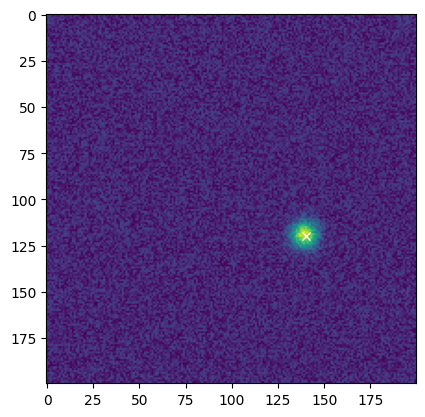

In [6]:
import matplotlib.pyplot as plt

x = np.linspace(0, 200, 200)
y = np.linspace(0, 200, 200)
x, y = np.meshgrid(x, y)
initial_values = [4, 140, 120, 5, 0]
z = utils.gaussian_2D((x, y), *initial_values).reshape(len(x), len(y))
z = z + np.random.rand(*z.shape) 

# Find star
star_x, star_y = ap_utils.fit_star_position(z, (x,y))

plt.imshow(z)
plt.plot([star_x], [star_y], marker='x', color='white')
plt.show()

Now crop to star only

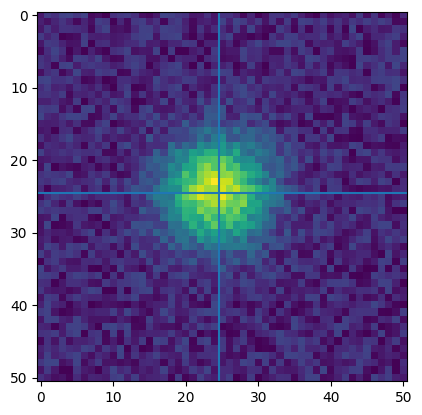

In [7]:
width = 51
cropped = utils.subarray_2D(z, star_x, star_y, width)
plt.imshow(cropped)
plt.axhline(width//2-0.5)
plt.axvline(width//2-0.5)
plt.show()